# The iterative process

image.png

## install extra library

In [1]:
! pip install pycaret pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 94.0 MB/s eta 0:00:

## import library

In [2]:
# import library

import pandas as pd
import numpy as np
import IPython
import seaborn as sns
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTENC

<ipython-input-2-0a37d38e765c>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Data Exploration

### Problem Definition &  Data Wragling

In [3]:
# config
data_path = './predictive_maintenance.csv'
data_profile_path = 'profile.html'
transformed_profile_path = 'transformed_data.html'
exp_name = 'experiment1'
pipeline_name = 'best_pipeline'
matrix = 'F1'
is_norm = True
is_gpu = True
n_fold = 5
sess_id = 1
seed = 2023
val_size=0.2

In [4]:
# read data from csv file
data_df = pd.read_csv(data_path)
data_df.head(5) # quick review 5 rows of the data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

### EDA

In [5]:
# change column name (remove [ ])
# there might be error if there is "[ ]" in column name
data_df.columns = data_df.columns.str.replace('[', '')
data_df.columns = data_df.columns.str.replace(']', '')
data_df.columns = data_df.columns.str.replace(' ', '_')
data_df.head(5)

<ipython-input-5-3a9a0abdc939>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df.columns = data_df.columns.str.replace('[', '')
<ipython-input-5-3a9a0abdc939>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_df.columns = data_df.columns.str.replace(']', '')


UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
0    1     M14860    M              298.1                  308.6   
1    2     L47181    L              298.2                  308.7   
2    3     L47182    L              298.1                  308.5   
3    4     L47183    L              298.2                  308.6   
4    5     L47184    L              298.2                  308.7   

   Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Target Failure_Type  
0                  1551       42.8              0       0   No Failure  
1                  1408       46.3              3       0   No Failure  
2                  1498       49.4              5       0   No Failure  
3                  1433       39.5              7       0   No Failure  
4                  1408       40.0              9       0   No Failure

In [6]:
# EDA
prof = ProfileReport(data_df)
prof.to_file(output_file=data_profile_path)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
IPython.display.HTML(filename=data_profile_path)

Output hidden; open in https://colab.research.google.com to view.

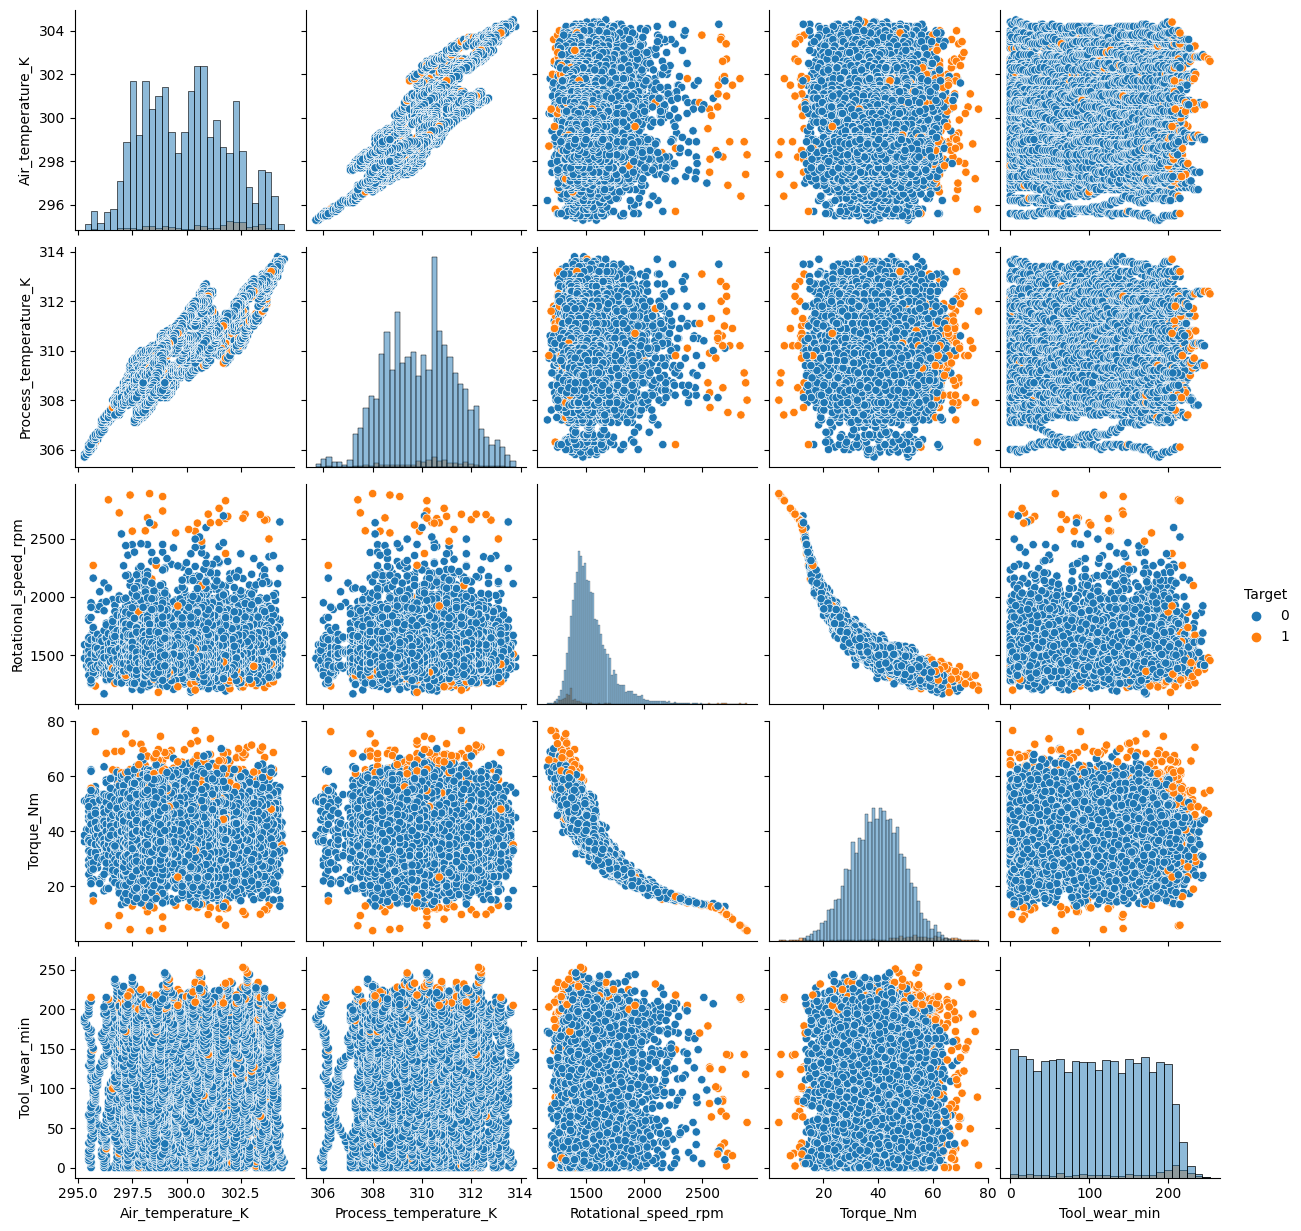

In [8]:
sns.pairplot(data_df.drop(['UDI'], axis=1), hue="Target", diag_kind="hist")

### Model design

In [9]:
# so we import classification
from pycaret.classification import *

- Model Types -> Classificaition model
    - the Pycaret will help us to choose the model in the next step
- Splitting data will be done on next step by Pycaret

## Model Development

### Feature Engineering

ดDeal with imbalance dataset by using imblearn library
SMOTENC will over-sampling the minority data

In [10]:
X = data_df.drop(['Target'], axis=1)
y = data_df['Target']

In [11]:
sm = SMOTENC(random_state=42, categorical_features=[0, 1, 2, 8])
X_res, y_res = sm.fit_resample(X, y)

check if data is balance or not

In [12]:
y_res.value_counts()

0    9661
1    9661
Name: Target, dtype: int64

concat target and features

In [13]:
data_df = pd.concat([X_res, y_res], axis=1)
data_df.shape

(19322, 10)

Preprocessing data with pycaret.
Pycaret will show some useful information such as number of test dataset, how many features we ignore, etc.

In [14]:
# pycaret will automatically Done some of model Development, data cleaning and transformfor you
session = setup(data_df,
                target='Target',
                experiment_name=exp_name,
                categorical_features=['Type'], # convert categorical to numerical
                ignore_features=['UDI', 'Product_ID', 'Failure_Type'], # drop columns
                normalize=is_norm, # normalize data
                fold=n_fold, # k-fold cross validation
                use_gpu=is_gpu,
                session_id = sess_id)

EDA data after preprocessing

In [15]:
sns.pairplot(get_config('dataset_transformed')[['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min', "Target"]], hue="Target", diag_kind="hist")

In [16]:
get_config('test_transformed')

Type_M    Type_L    Type_H  Air_temperature_K  Process_temperature_K  \
15866 -0.537202  0.623381 -0.243323          -0.023021               0.085951   
3218  -0.537202  0.623381 -0.243323           0.073351              -0.412771   
1199   1.861497 -1.604156 -0.243323          -1.813949              -1.688804   
1219   1.861497 -1.604156 -0.243323          -1.813949              -1.538675   
13580 -0.537202  0.623381 -0.243323           0.951093               0.875838   
...         ...       ...       ...                ...                    ...   
176   -0.537202  0.623381 -0.243323          -1.150837              -1.538675   
1314   1.861497 -1.604156 -0.243323          -0.742779               0.112637   
17250 -0.537202 -1.604156  4.109770           1.130278               0.302922   
19291 -0.537202  0.623381 -0.243323          -0.814976              -0.917219   
1523  -0.537202  0.623381 -0.243323          -1.099841              -0.863137   

       Rotational_speed_rpm  Torque_Nm  Tool_wear_min  Target  
15866             -0.458824   0.360424       1.172901       1  
3218              -0.303781   0.616910      -0.850850       0  
1199               1.601523  -1.757015      -0.822145       0  
1219              -0.541513  -0.226834       0.024673       0  
13580             -0.620757   1.567001       1.101136       1  
...                     ...        ...            ...     ...  
176                0.357735  -0.734511      -1.238377       0  
1314               0.416307  -0.748811       0.613140       0  
17250             -0.479496   0.455943      -0.204972       1  
19291              0.426643  -0.903848       0.799727       1  
1523               0.016641  -0.577202      -1.209671       0  

[5797 rows x 9 columns]

In [17]:
# EDA
# show class distribusion
prof = ProfileReport(get_config('dataset_transformed'))
prof.to_file(output_file=transformed_profile_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
IPython.display.HTML(filename=transformed_profile_path)

Output hidden; open in https://colab.research.google.com to view.

### Experiments and Tuning

In [19]:
# compare baseline models
# pycaret will choosing the model with the highest f1-score
best = compare_models(sort=matrix)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

tuning model


In [20]:
best = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


### Model evaluation

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

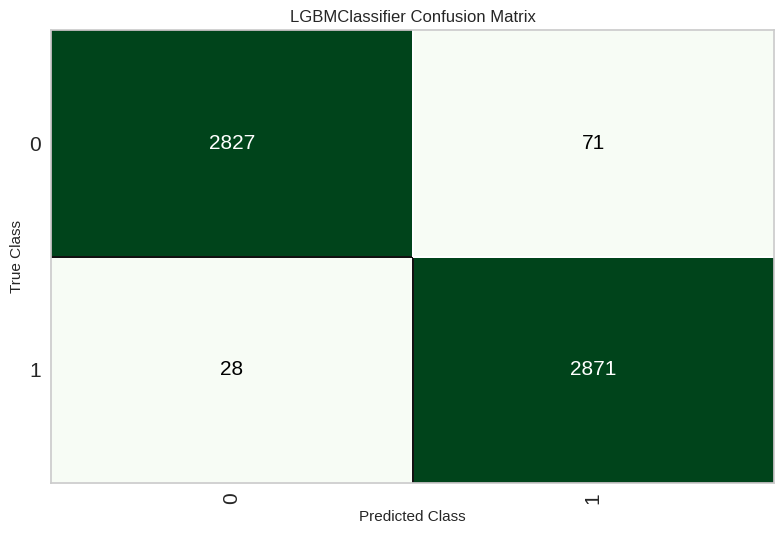

In [21]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

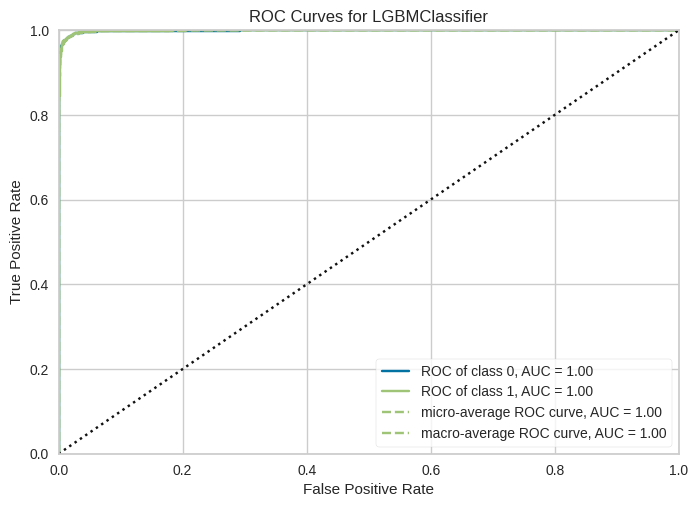

In [22]:
# plot AUC
plot_model(best, plot = 'auc')

In [23]:
# plot feature importance
plot_model(best, plot = 'feature')

try our model

In [24]:
sample_data = data_df.sample(n=10).drop(['Target'], axis=1)

In [25]:
sample_data.head()

UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
12168  4449     L51628    L         302.381056             310.287371   
6440   6441     L53620    L         300.600000             310.200000   
15254  4449     M19221    L         302.206354             310.338729   
4733   4734     L51913    L         303.300000             311.600000   
10830   848     M22857    L         301.680861             310.154809   

       Rotational_speed_rpm  Torque_Nm  Tool_wear_min  \
12168                  1374  51.010560            163   
6440                   1648  31.700000             46   
15254                  1374  53.293043            160   
4733                   1484  44.600000            223   
10830                  2826   5.750701            212   

                   Failure_Type  
12168  Heat Dissipation Failure  
6440                 No Failure  
15254  Heat Dissipation Failure  
4733                 No Failure  
10830             Power Failure

In [26]:
predictions = predict_model(best, data = sample_data)
predictions.head()

UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
12168  4449     L51628    L         302.381042             310.287384   
6440   6441     L53620    L         300.600006             310.200012   
15254  4449     M19221    L         302.206360             310.338715   
4733   4734     L51913    L         303.299988             311.600006   
10830   848     M22857    L         301.680847             310.154816   

       Rotational_speed_rpm  Torque_Nm  Tool_wear_min  \
12168                  1374  51.010559            163   
6440                   1648  31.700001             46   
15254                  1374  53.293041            160   
4733                   1484  44.599998            223   
10830                  2826   5.750701            212   

                   Failure_Type  prediction_label  prediction_score  
12168  Heat Dissipation Failure                 1            0.9985  
6440                 No Failure                 0            0.9983  
15254  Heat Dissipation Failure                 1            0.9986  
4733                 No Failure                 0            0.7659  
10830             Power Failure                 1            0.9984

In [27]:
# save model
save_model(best, pipeline_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Air_temperature_K',
                                              'Process_temperature_K',
                                              'Rotational_speed_rpm',
                                              'Torque_Nm', 'Tool_wear_min'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               ver...
             

# load and try our model

In [28]:
loaded_best_pipeline = load_model(pipeline_name)
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Air_temperature_K',
                                             'Process_temperature_K',
                                             'Rotational_speed_rpm',
                                             'Torque_Nm', 'Tool_wear_min'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              ver...
                                colsample_bytree=1.0, feature_fraction=0.6,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_child_samples=100,
                                min_child_weight=0.001, min_split_gain=0.6,
                                n_estimators=280, n_jobs=-1, num_leaves=70,
                                objective=None, random_state=1, reg_alpha=0.1,
                                reg_lambda=0.001, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [29]:
predictions = predict_model(loaded_best_pipeline, data = sample_data)
predictions.head()

UDI Product_ID Type  Air_temperature_K  Process_temperature_K  \
12168  4449     L51628    L         302.381042             310.287384   
6440   6441     L53620    L         300.600006             310.200012   
15254  4449     M19221    L         302.206360             310.338715   
4733   4734     L51913    L         303.299988             311.600006   
10830   848     M22857    L         301.680847             310.154816   

       Rotational_speed_rpm  Torque_Nm  Tool_wear_min  \
12168                  1374  51.010559            163   
6440                   1648  31.700001             46   
15254                  1374  53.293041            160   
4733                   1484  44.599998            223   
10830                  2826   5.750701            212   

                   Failure_Type  prediction_label  prediction_score  
12168  Heat Dissipation Failure                 1            0.9985  
6440                 No Failure                 0            0.9983  
15254  Heat Dissipation Failure                 1            0.9986  
4733                 No Failure                 0            0.7659  
10830             Power Failure                 1            0.9984